# Прогнозирование оттока клиентов

**Постановка задачи**

Заказчик исследования — сеть фитнес-центров "Культурист-датасаентист". Необходимо провести анализ данных о клиентах и подготовить план действий по удержанию клиентов.

**Цели исследования**
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1. выделить целевые группы клиентов;
    2. предложить меры по снижению оттока;
    3. определить другие особенности взаимодействия с клиентами.
    
**Описание данных**

- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- `Churn` — факт оттока в текущем месяце.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Получение-и-ознакомление-с-данными" data-toc-modified-id="Получение-и-ознакомление-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Получение и ознакомление с данными</a></span></li><li><span><a href="#Средния-значения-признаков" data-toc-modified-id="Средния-значения-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Средния значения признаков</a></span></li><li><span><a href="#Распредение-признаков" data-toc-modified-id="Распредение-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Распредение признаков</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Матрица корреляций</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-модели-и-анализ-метрик" data-toc-modified-id="Обучение-модели-и-анализ-метрик-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение модели и анализ метрик</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных-и-дендограмма" data-toc-modified-id="Стандартизация-данных-и-дендограмма-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Стандартизация данных и дендограмма</a></span></li><li><span><a href="#Алгоритм-KMeans" data-toc-modified-id="Алгоритм-KMeans-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Алгоритм KMeans</a></span></li><li><span><a href="#Средние-значения-и-визуализация-распределений-признаков-по-кластерам" data-toc-modified-id="Средние-значения-и-визуализация-распределений-признаков-по-кластерам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Средние значения и визуализация распределений признаков по кластерам</a></span></li><li><span><a href="#Доля-оттока-по-кластерам" data-toc-modified-id="Доля-оттока-по-кластерам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Доля оттока по кластерам</a></span></li></ul></li><li><span><a href="#Общие-выводы-и-рекомендации" data-toc-modified-id="Общие-выводы-и-рекомендации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общие выводы и рекомендации</a></span></li></ul></div>

## Импорт библиотек

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

sns.set_style('darkgrid')
warnings.simplefilter('ignore')

print('Библиотеки успешно импортированы')

Библиотеки успешно импортированы


## Исследовательский анализ данных

### Получение и ознакомление с данными

In [2]:
gym = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

In [3]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym.duplicated().sum()

0

Мы получили датафрейм, состоящий из 4000 наблюдений. В нём присутсвуют 13 признаков и 1 целевая переменная (факт оттока). В нашем исследовании считаем, что клиент ушёл в отток, если не посещал фитнес-центр 1 месяц. В данных нет пропусков и нет явных дубликатов. Среди данных есть категориальные переменные, но они уже представлены числовым форматом, что подходит для наших целей.

Для удобства работы приведём названия столбцов датафрейма к snake_case. 

In [6]:
gym.columns = [col.lower() for col in gym.columns]

In [7]:
gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Из четырёх тысяч клиентов около тысячи ушли в отток.

### Средния значения признаков

Рассмотрим средние зачения признаков в двух группах клиентов, тех, кто остался, и тех, кто ушёл в отток.

In [8]:
gym.groupby('churn').mean().T.style.format('{:.2f}')

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


Уже из этих данных мы можем сделать некоторые наблюдения, например, в отток чаще уходят клиенты, у которых куплены менее длительные абонементы, они реже приходят по акции "Приведи друга" и реже являются работниками компаний-партнёров фитнес центра. Срдений возраст клиентов из оттока является 27 лет, средний возраст действующих клиентов 30 лет. Клиенты из оттока в среднем меньше посещаят фитнес-центр, а также меньше платят за дополнительные услуги (кафе, спорттовары и т.д.).

### Распредение признаков

In [9]:
# зададим функцию построения нескольких графиков по списку признаков
def multiple_plots(plot, data, columns, **kwargs):
    '''
    Функция отображает несколько графиков в два столбца.
    '''
    plots_quantity = len(columns)
    n_rows = int(plots_quantity / 2) if plots_quantity % 2 == 0 else int(plots_quantity / 2 + 1)
    n_cols = 2
    i = 1
    
    plt.figure(figsize=(15, 20))
    
    for col in columns: 
        plot(data=data, x=col, ax=plt.subplot(n_rows, n_cols, i), **kwargs)
        plt.title(col)
        i += 1
    plt.tight_layout()    
    plt.show()

In [10]:
# сохраним названия столбцов категориальных и непрерывных данных в отдельных списках
category_columns = [
    'gender',
    'near_location',
    'partner',
    'promo_friends',
    'phone',
    'group_visits',
]
numeric_columns = [
    'contract_period',
    'age',
    'avg_additional_charges_total',
    'month_to_end_contract',
    'lifetime',
    'avg_class_frequency_total',
    'avg_class_frequency_current_month',
]

Построим графики распредения числовых и категориальных признаков.

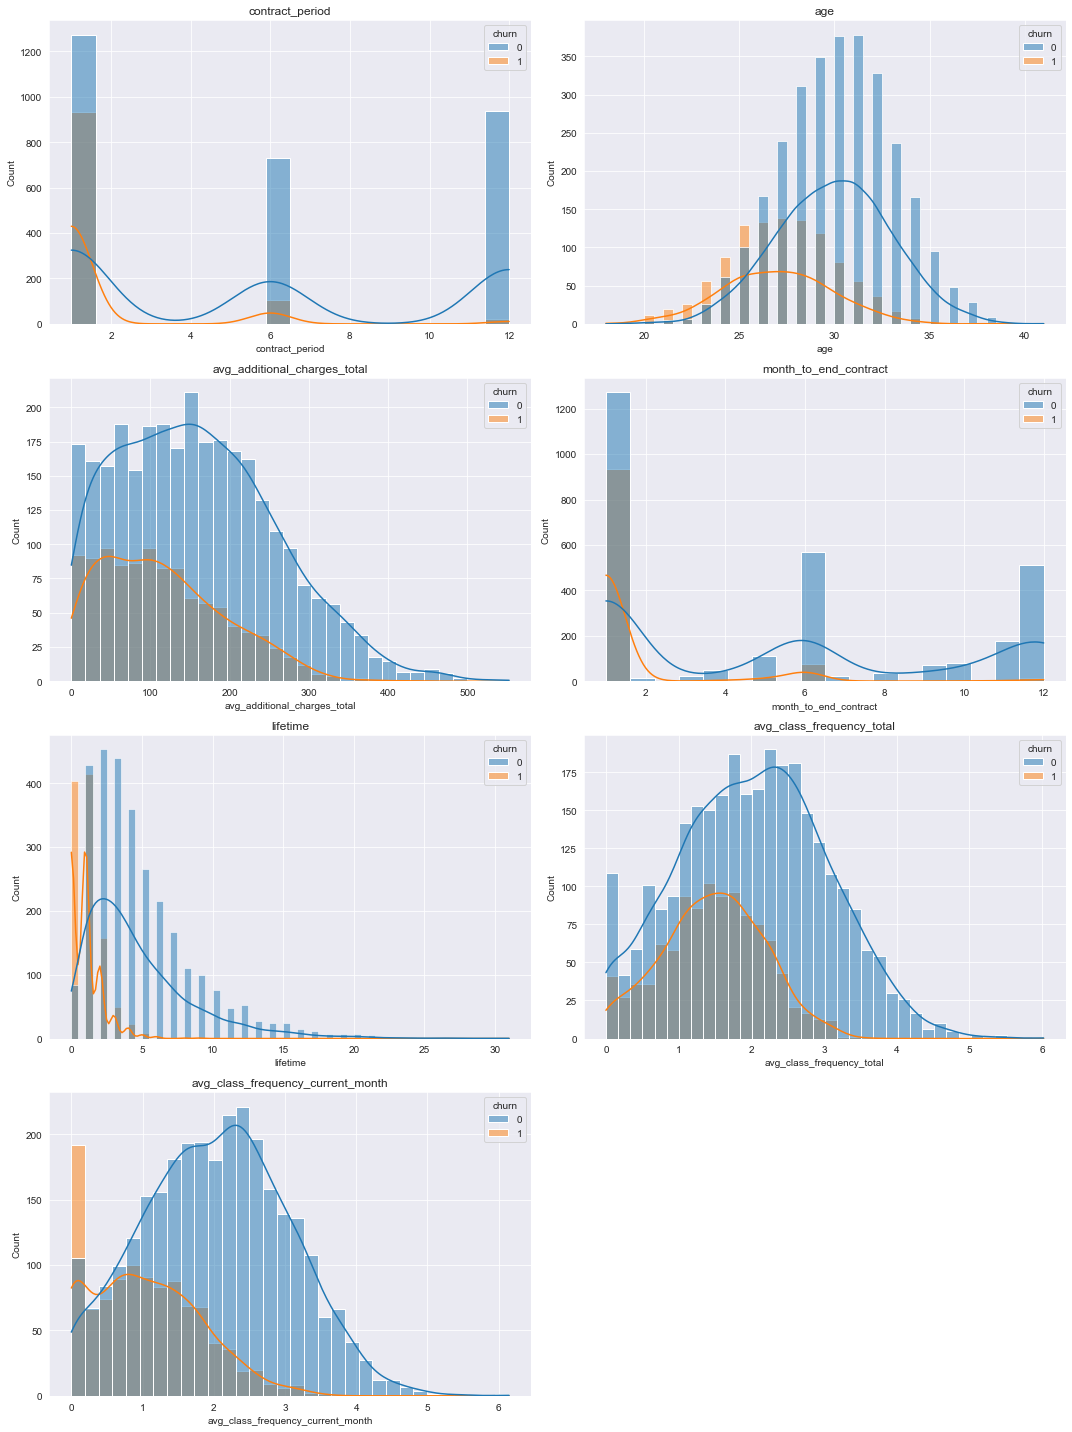

In [11]:
multiple_plots(sns.histplot, gym, numeric_columns, hue='churn', palette='tab10', kde=True)

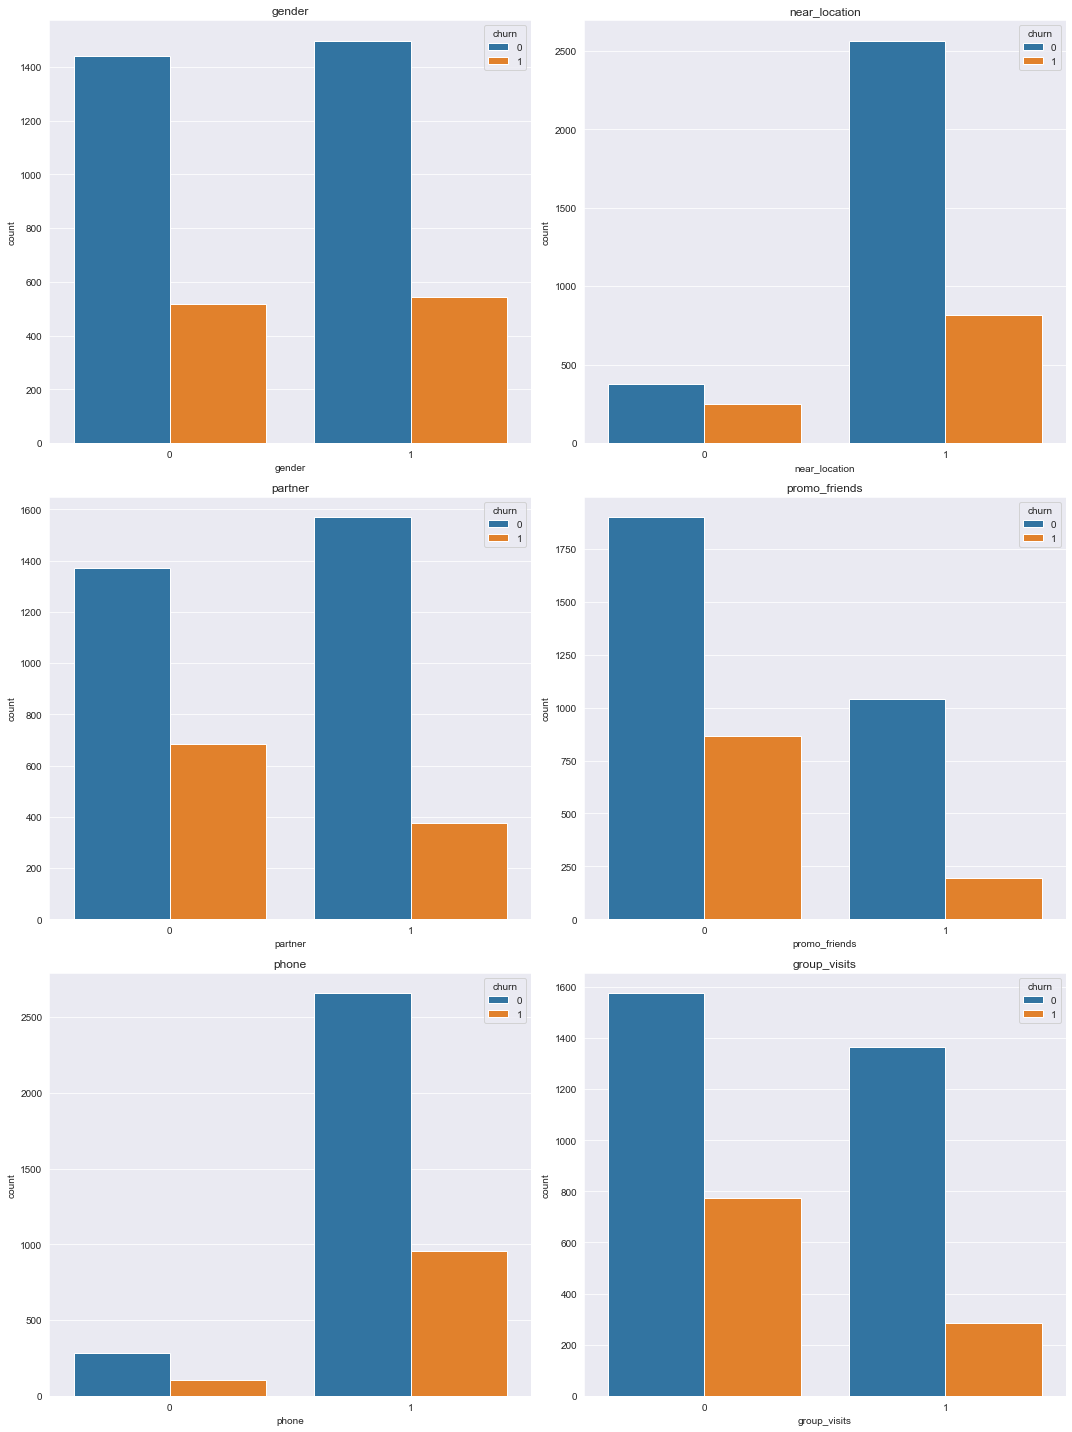

In [12]:
multiple_plots(sns.countplot, gym, category_columns, hue='churn', palette='tab10')

По полученным графикам мы можем подтвердить и дополнить предыдущие наблюдения:
- клиенты из нашей выборки могли приобрести абонементы на полгода и на год. В отток уходят в осноном клиенты без абонемента. С абонементом на 6 месяцев уходят в отток чаще, чем с абонементом на 12. Действующие клиенты чаще берут абонемент на 12 месяцев, чем на 6;
- возраст клиентов из оттока ниже, чем у действующих клиентов;
- клиенты из оттока реже и на меньшую сумму покупают дополнительные услуги;
- клиенты из оттока реже посещают занятия
- клиенты, которые живут рядом с фитнес-центром, значитительно реже уходят в отток
- клиенты, которых пришли по акции "приведи друга", которые работают в компании-партнёре фитнес-центра, или котороые принимают участие в групповых знятиях, реже уходят в отток

### Матрица корреляций

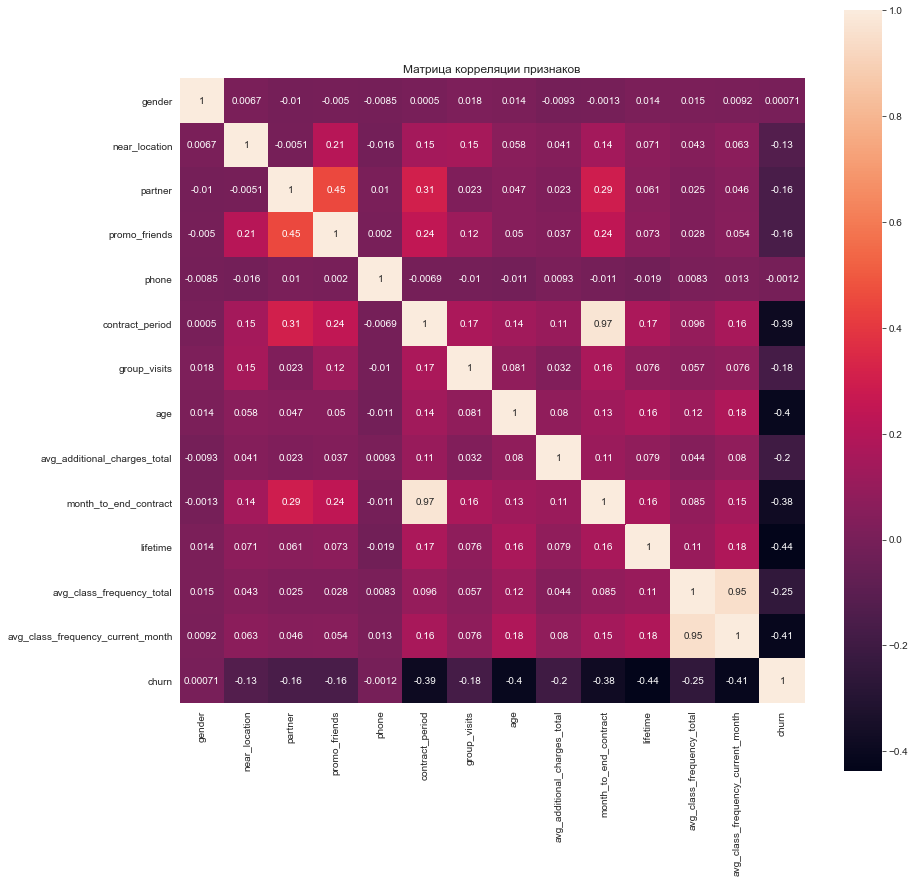

In [13]:
cm = gym.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(cm, annot=True, square=True)
plt.title('Матрица корреляции признаков')
plt.show()

По матрице корреляций мы можем сделать вывод, что между собой значительно коррелируют пары признаков contract_period - month_to_end_contract и avg_class_frequency_total - avg_class_frequency_current month. Это логично, так как эти признаки взаимосвязаны. При прогнозировании мы будем использовать две модели обучения: **логистическая регрессия** и **случайный лес**. Если случайный лес нечувствителен к мультиколлинеарности, то для логистической регрессии это проблема, так как эта модель склонна к переобучению. Для логистической регрессии сделаем отдельный набор признаков, в котором оставим только один из пары сильно коррелирующих признаков. 

In [14]:
gym_lr = gym.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

## Модель прогнозирования оттока клиентов

### Подготовка данных

Разделим данные на обучающую и валидационную выборки.

In [15]:
X = gym.drop('churn', axis=1)
y = gym['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

X_lr = gym_lr.drop('churn', axis=1)
y_lr = gym_lr['churn']
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=0, stratify=y)

In [16]:
print(f'''Количество наблюдений в обучающей выборке: {X_train.shape[0]}
Количество наблюдений в валидационной выборке: {X_test.shape[0]}''')

Количество наблюдений в обучающей выборке: 3200
Количество наблюдений в валидационной выборке: 800


### Обучение модели и анализ метрик

Зададим функцию, которая обучит модели и посчитает метрики для выбранных нами моделей. В качестве метрик рассмотрим accuracy, precision и recall.

In [17]:
def make_prediction(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'''Model: {model}
Accuracy: {accuracy_score(y_test, y_pred):.2f}
Precision: {precision_score(y_test, y_pred):.2f}
Recall: {recall_score(y_test, y_pred):.2f}
F1: {f1_score(y_test, y_pred):.2f}
''')

Обучим модель двумя способами: логистической регрессией и случайным лесом. Рассмотрим результаты метрик.

In [18]:
make_prediction(LogisticRegression(max_iter=400, random_state=0), X_train_lr, y_train_lr, X_test_lr, y_test_lr)
make_prediction(RandomForestClassifier(n_estimators=100, random_state=0), X_train, y_train, X_test, y_test)

Model: LogisticRegression(max_iter=400, random_state=0)
Accuracy: 0.92
Precision: 0.85
Recall: 0.84
F1: 0.84

Model: RandomForestClassifier(random_state=0)
Accuracy: 0.92
Precision: 0.88
Recall: 0.83
F1: 0.85



Обе модели довольно близки по метрикам, особенно что касается самой важной для нас метрики: recall (полнота). Наша бизнес-задача - минимизировать количество false negative результатов, когда модель ошибочно решает, что клиент не прекратил занятия в фитнес-центре.

Однако по остальным метрикам модель **случайный лес** опережает логистическую регрессию, поэтому мы выберем именно её для прогноза оттока клиентов.

## Кластеризация клиентов

### Стандартизация данных и дендограмма

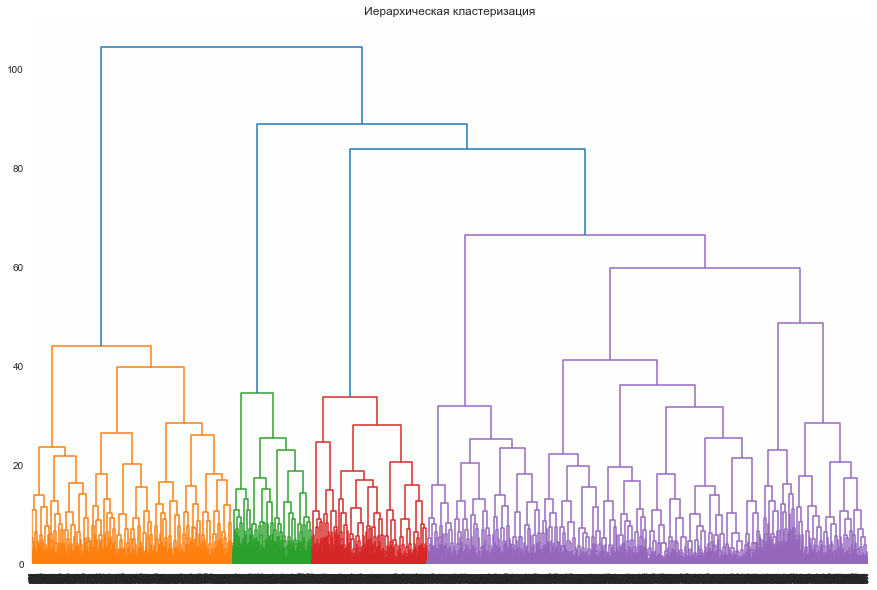

In [19]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method='ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

По полученным данным мы можем разделить пользователей примерно на 4-6 кластеров. Для дальнейшего исследования выберем среднее значение **5 кластеров**.

### Алгоритм KMeans

Обучим алгоритм KMeans и добавим информацию о кластерах в датафрейм.

In [20]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)
# внесём кластеры в оригинальный датафрейм
gym['cluster'] = labels
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


### Средние значения и визуализация распределений признаков по кластерам 

In [21]:
# зададим функцию отображения нескольких графиков по категориальным данным с разделением на кластеры
def multiple_cluster_category_plots(plot, data, columns, **kwargs):
    '''
    Функция отображает несколько графиков в два столбца, используется для категориальных данных с разделением на кластеры.
    '''
    plots_quantity = len(columns)
    n_rows = int(plots_quantity / 2) if plots_quantity % 2 == 0 else int(plots_quantity / 2 + 1)
    n_cols = 2
    i = 1
    
    plt.figure(figsize=(15, 20))
    
    for col in columns: 
        plot(data=data, x='cluster', hue=col, ax=plt.subplot(n_rows, n_cols, i), **kwargs)
        plt.title(col)
        plt.xlabel('Кластер')
        i += 1
    plt.tight_layout()    
    plt.show()

Рассмотрим средние значения признаков по кластерам.

In [22]:
gym.groupby('cluster').mean().T.style.format('{:.2f}')

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


Визуализируем распредления количественных и категориальных признаков по кластерам.

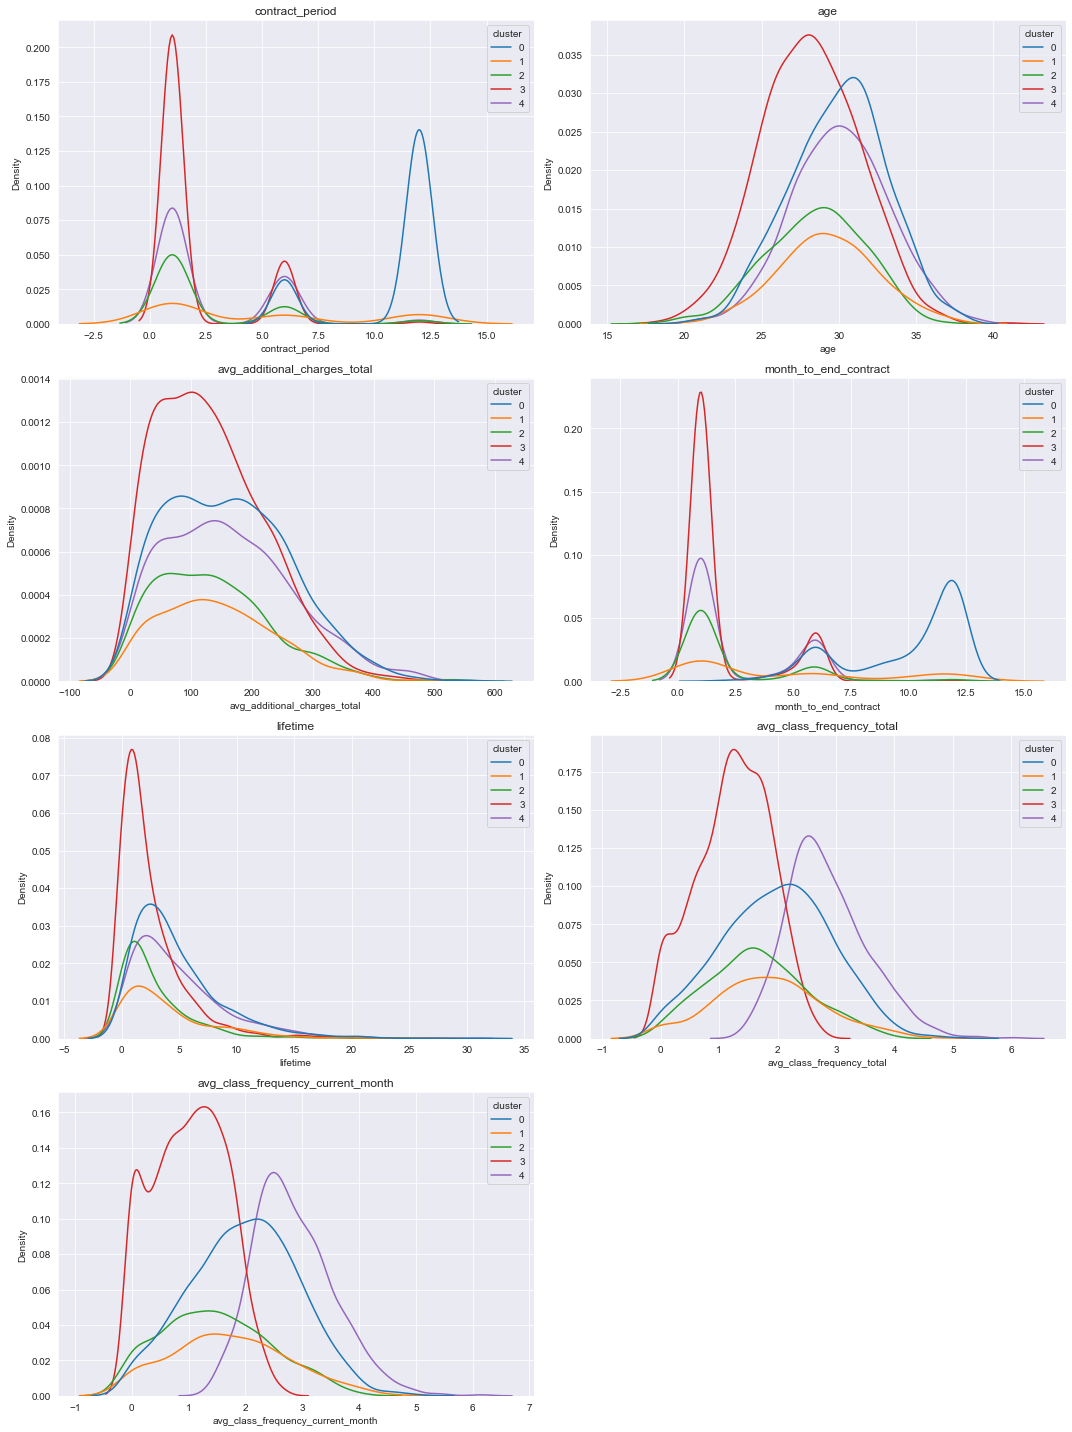

In [23]:
multiple_plots(sns.kdeplot, gym, numeric_columns, hue='cluster', palette='tab10')

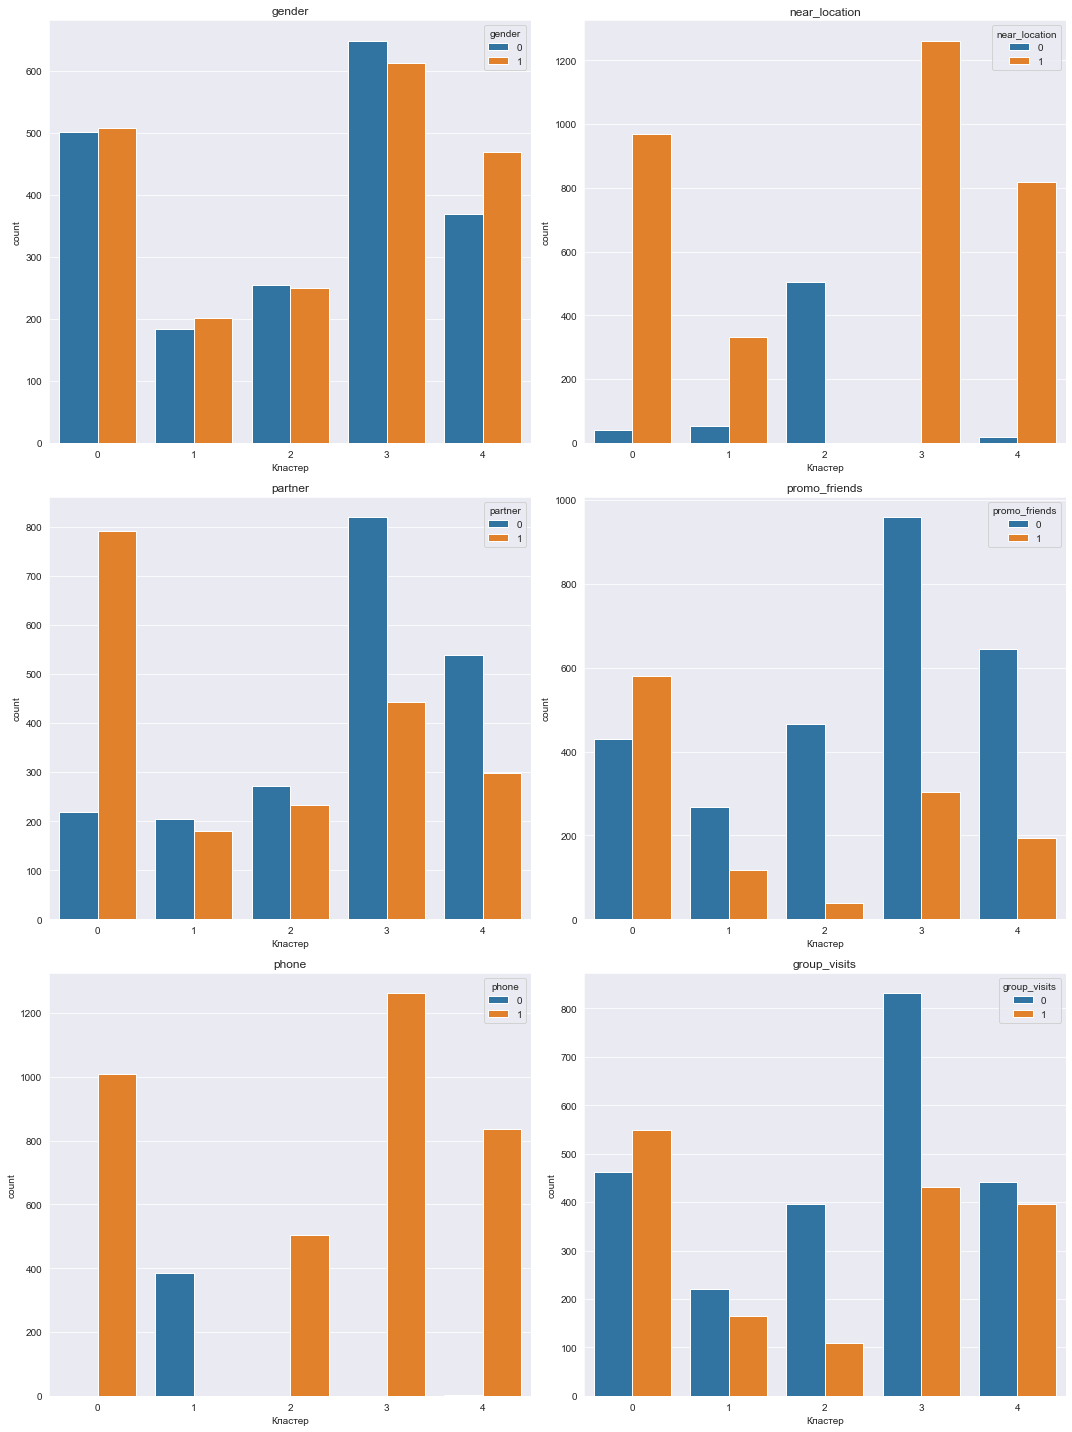

In [24]:
multiple_cluster_category_plots(sns.countplot, gym, category_columns, palette='tab10')

По полученным данным мы можем выделить следующие наблюдения:
- Самые преданные клиенты попали в кластеры **0** и **4**, шанс их ухода в отток составляет менее 7%;
- Во всех кластерах довольно ровное разделение по полу и по возрасту;
- Кластеры с наименьшей долей оттока (**0** и **4**) показывают самые высокие показатели выручки с дополнительных услуг. Они также чаще других участвуют в групповых занятиях и имеют самый высокий лайфтайм и посещаемость занятий.


### Доля оттока по кластерам

In [25]:
cluster = (
    gym
    .query('churn == 1')
    .groupby('cluster')
    .agg({'cluster': 'count'})
    .rename(columns={'cluster': 'churn_clients'})
)
cluster['total_clients'] = gym.groupby('cluster').agg({'cluster': 'count'})
cluster['ratio'] = (cluster['churn_clients'] / cluster['total_clients']).round(2)
cluster

,churn_clients,total_clients,ratio
cluster,,,
0,28,1010,0.03
1,103,385,0.27
2,224,505,0.44
3,649,1262,0.51
4,57,838,0.07


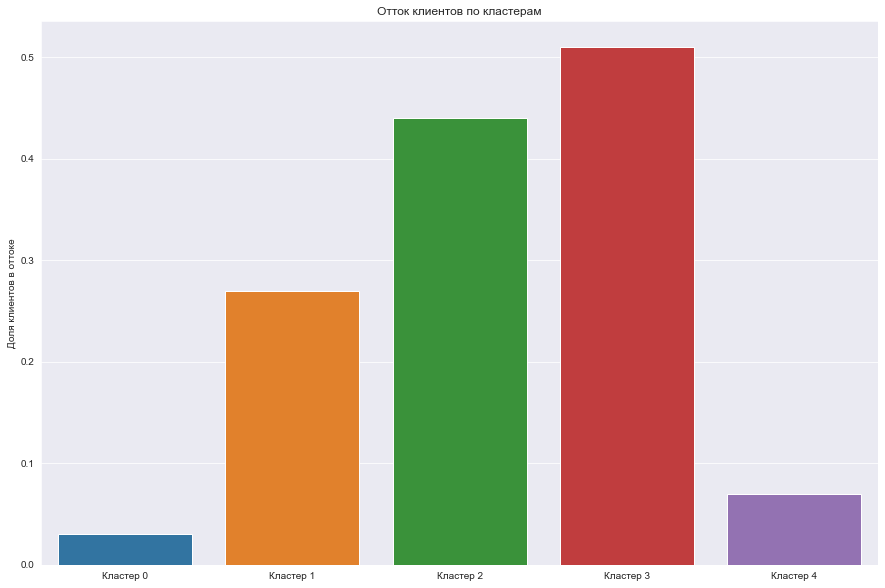

In [26]:
plt.figure(figsize=(15, 10))
x_axis = ['Кластер 0','Кластер 1','Кластер 2','Кластер 3','Кластер 4']
sns.barplot(data=cluster, x=x_axis, y='ratio')
plt.title('Отток клиентов по кластерам')
plt.ylabel('Доля клиентов в оттоке')
plt.show()

В кластеры **0** и **4** попали самые лояльные клиенты, процент их оттока составляет меньше 7%. Средний по оттоку кластер - **1**, показатель оттока составляет 27%. Особое внимание нужно уделить кластерам **2** и **3** с самыми высокими показателями оттока - 44% и 51%. 

## Общие выводы и рекомендации

Мы провели анализ данных о клиентах сети фитнес-центров. Для целей исследования нам были предоставлены данные о клиентах сети с их признаками и с целевой переменной - фактом ухода клиента в отток. В данных были 4000 наблюдений и 13 признаков. Исходные данные были хорошего качества, без пропусков и без дубликатов.

Мы рассмотрели средние значения признаков, а также построили графики их распределений, что позволило нам сформулировать первые наблюдения, такие как:
- клиенты с абонементом редко уходят в отток, действующие клиенты чаще покупают абонемент на год, чем на полгода;
- средний возраст клиентов из оттока 27 лет, средний возраст действующих клиентов 30 лет;
- клиенты из оттока принеосят меньшую выручку за дополнительные услуги;
- клиенты, которые живут рядом, значительно реже уходят в отток.
Мы также построили матрицу корреляций признаков, нашли значительно коррелирующие пары признаков и обработали их для дальнейшего более эффективного обучения моделей.

Мы обучили и протестировали две модели прогнозирования ухода клиентов в отток: логистическую регрессию и случайный лес. В итоге мы остановились на случайном лесе, эта модель показала себя лучше по всем признакам, она даёт прогноз с точностью около 92%.

Мы стандартизировали данные и построили дендограмму, чтобы выяснить, на какое количнство кластеров лучше разделить клиентов. Мы приняли решение разделить клиентов на 5 кластеров, используя алгоритм KMeans.

Мы рассмотрели распределения признаков с разделением по кластерам. Список полученных кластеров:
- **Кластер 0**. Размер кластера: 1010 клиентов. Самые лояльные клиенты, вероятность ухода в отток составляет около 3%. Покупают абонемент в основном на 12 месяцев. Почти всегда живут или работают рядом. Очень часто являются сотрудниками компаний-партнёров фитнес-центра, поэтому покупают абонемент по скидке. 
- **Кластер 1**. Размер кластера: 385 клиентов. Клиенты-"середнячки". Вероятность ухода в отток составляет 27%. Имеют довольно средние показатели числовых признаков. В основном живут близко в фитнес-центру. Чаще приходят самостоятельно, а не по акции "приведи друга". У фитнес-центра нет наличия контактного телефона этих клиентов.
- **Кластер 2**. Размер кластера: 505 клиентов. Высокая вероятность ухода в отток: 44%. Обычно не имеют абонемента, реже имеют абонемент на полгода. Имеют довольно низкий лайфтайм, в среднем меньше трёх месяцев. Всегда живут или работают близко от фитнес-центра. Крайне редко приходят по акции "приведи друга".
- **Кластер 3**. Размер кластера: 1262 клиента. Наивысшая вероятность ухода в отток: 51%. Практически всегда без абонемента, редко имеют абонемент на полгода. Приносят самую малую среднюю выручку за дополнительные услуги. Реже всех других клиентов посещают занятия. Почти всегда живут или работают рядом с фитнес-центром. Редко приходят по акции "приведи друга" и редко посещают групповые занятия.
- **Кластер 4**. Размер кластера: 838 клиентов. Одни из самых лояльных клиентов, с вероятностью ухода в отток 7%. Чаще не имеют абонемента, или имеют абонемент на полгода. В среднем приносят самую большую выручку за дополнительные услуги, а также значительно чаще других посещают занятия. Почти всегда живут или работают рядом. Редко приходят по акции "приведи друга" и нечасто работают в компаниях-партнёрах фитнес-центра.

Принимая во внимание полученные выводы, мы можем дать следующие рекомендации по увеличению доли лояльных клиентов:
- Продолжать развитие сети компаний-партнёров фитнес-центра, предоставляя скидки таким клиентам. Из таких компаний приходят довольно лояльные клиенты, которые редко уходят в отток.
- Проанализировать территориальное расположение клиентов и открыть дополнительные филиалы в местах скоплений клиентов, которые в данный момент живут или работает далеко от существующих фитнес-центров. Территориальная близость сильно влияет на лояльность.
- Мотивировать клиентов покупать абонементы именно на 12 месяцев, возможно предоставляя на это дополнительные скидки. За это время клиент принесёт больше выручки за дополнительные услуги, а также будет иметь больше шансов успеть привести друзей.
- Мотивировать новых клиентов записываться на групповые занятия. Клиенты, посещающие групповые занятия значительно реже уходят в отток.